# Лабораторная работа “ЛАЗЕРНО-ФЛУОРЕСЦЕНТНАЯ СПЕКТРОСКОПИЯ МОЛЕКУЛ”
## В  настоящем блокноте представлена  программа для  выполнения следующих задач:<br>
### 1)Усреднение спектра и определение  дрейфа длины волны лазера (если измерений больше одного)
### 2) Описание спектра

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.signal import argrelextrema
from scipy.signal import find_peaks, peak_widths,savgol_filter
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit
import copy
import math
from scipy.stats import t

In [2]:
data_path =  "spectroscopy_lab_data"
save_path = "results"

In [3]:
def unpack(path, mod): 
    file = open(path + "\\" + mod + ".dat", 'r' )
    data = file.readlines()
    data = [line.rstrip().replace("\t",',').split(",") for line in data]
    settings = data[:4]
    del data[:5]
    del data[-1]
    data = np.array(data).astype('float')
    wavelength = data[:,0]
    signal = data[:, 1]
    return  settings, wavelength, signal


def find_max(data, prominence, distance):
    max_ind = find_peaks(data[1],  prominence =  prominence, distance = distance)
    return [data[0][max_ind[0]],data[1][max_ind[0]], max_ind[0]]

mod = ["spectrum"]

In [4]:
settings, wavelength, signal  =  unpack(data_path,"spectrum")

In [5]:
wavelength -= 100 

Мы убавили каждую длину волны в измерении на 100 нм, вызвано это тем, что мы на момент выполнения работы, программа отвечающая за отображение данных имела неверные настройки(какие именно настройки и почему так получилось? - неизвестно, об этом знает только преподаватель) 

Нарисуем графики 

[444. 441. 434. ... 447. 470. 486.]


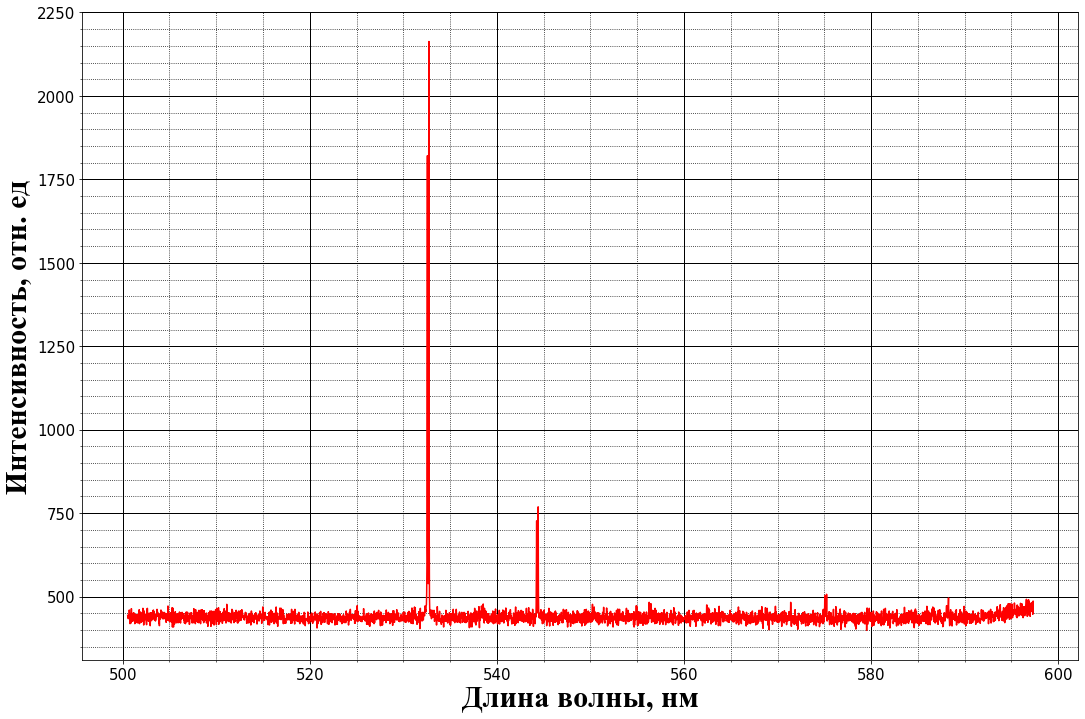

In [6]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1,1,1)
print(signal)
ax.plot(wavelength,  signal, c = 'r') 
ax.set_xlabel('Длина волны, нм',{'fontname':'Times New Roman'},fontweight='light',color='k', fontsize=30)
ax.set_ylabel("Интенсивность, отн. ед",{'fontname':'Times New Roman'},fontweight='light',color='k', fontsize=30)
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=15)
ax.minorticks_on()

#  Определяем внешний вид линий основной сетки:
ax.grid(which='major',
        color = 'k', 
        linewidth = 1)

#  Определяем внешний вид линий вспомогательной
#  сетки:
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.savefig(save_path + "\\" + "full_spectrum.jpg")

Представлен спектр флуоресценции йода.
В работе использовался Nd лазер на длине волны 532 нм. 

Проведем идентификацию спектральных линий йода(изотопа?). Рассмотрим более детально пики, то есть рассмотрим тонкую структуру.

[1163 1169]
[[532.579, array([1821.])], [532.742, array([2163.])]]


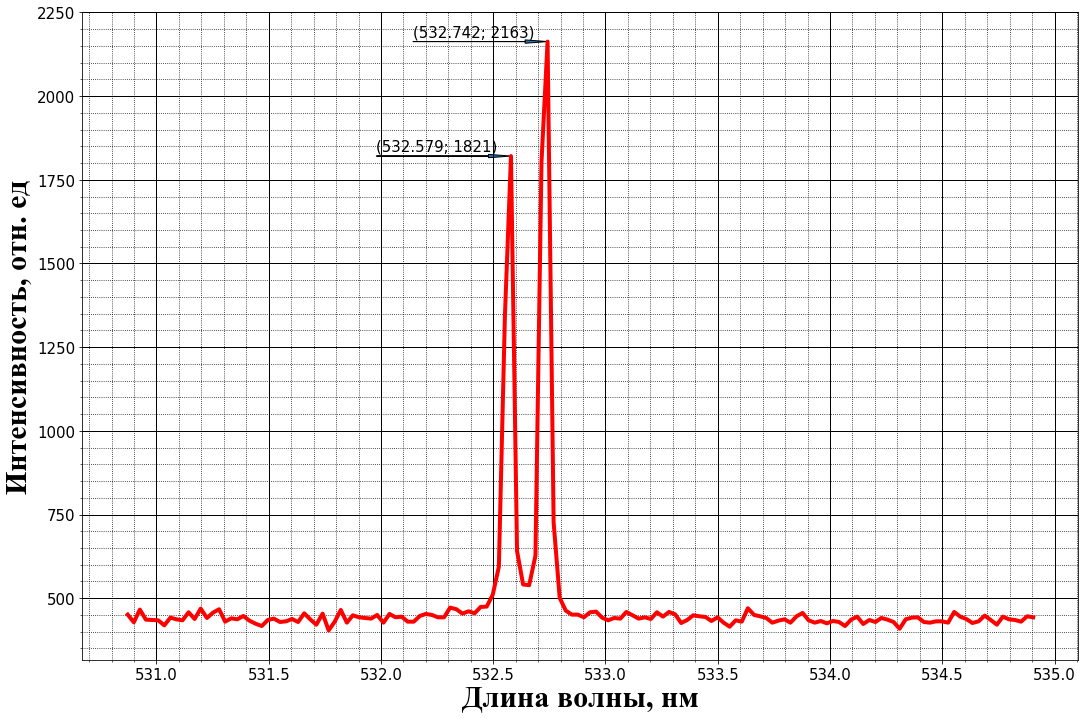

In [55]:
left = 1100
right = 1250
Max_int_index = find_peaks(signal, 1500)
print(Max_int_index[0])
print([[wavelength[i], signal[np.where(wavelength == wavelength[i])]]  for i in Max_int_index[0]])
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1,1,1)
ax.plot(wavelength[left:right],  signal[left:right], c = 'r',linewidth = 4 ) 
ax.set_xlabel('Длина волны, нм',{'fontname':'Times New Roman'},fontweight='light',color='k', fontsize=30)
ax.set_ylabel("Интенсивность, отн. ед",{'fontname':'Times New Roman'},fontweight='light',color='k', fontsize=30)
ax.arrow(wavelength[Max_int_index[0][0]]- 0.6,signal[np.where(wavelength == wavelength[Max_int_index[0][0]])], 0.5, 0,  head_width = 10, head_length = 0.1)
ax.arrow(wavelength[Max_int_index[0][1]]- 0.6,signal[np.where(wavelength == wavelength[Max_int_index[0][1]])], 0.5, 0,  head_width = 10, head_length = 0.1)
ax.text(wavelength[Max_int_index[0][0]]- 0.6,signal[np.where(wavelength == wavelength[Max_int_index[0][0]])] +15, "(532.579; 1821)", fontsize = 15)
ax.text(wavelength[Max_int_index[0][1]]- 0.6,signal[np.where(wavelength == wavelength[Max_int_index[0][1]])] +15, "(532.742; 2163)", fontsize = 15)
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=15)
ax.minorticks_on()

#  Определяем внешний вид линий основной сетки:
ax.grid(which='major',
        color = 'k', 
        linewidth = 1)

#  Определяем внешний вид линий вспомогательной
#  сетки:
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.savefig(save_path + "\\" + "first_doublet.jpg")

На рисунке разрешены переходы по отдельности. По графику можно определить, что линия, представляющая собой PR дублет, находится в интервале [532.498, 532.823] nm. Пики, отвечающие дуплету имеют следующие кооррдинаты [532.579, 1821], [532.742, 2163].
Оценка дрейфа длины волны лазера дается интервалом [0.579, 0.742] нм( просто длина волны лазера (532 нм) минус координаты пика). Валя почему то взял P - ветвь, и написал точное число в нашем случае будет($\lambda_{shift}$=0.579 нм)
Взглянем на спектр поглощения йода: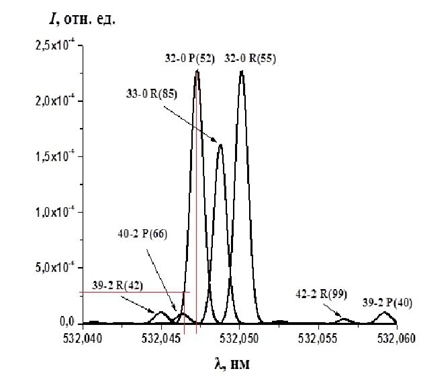
Предполагается, что излучение проводилось в пределах пика 32-0. Наши интервалы длин волн не совпадают на величену около 0.5 нм , что полностью перекрывается длиной волны. Вообще есть проблема с определением характеристик фотоприемника. Его спектральное разрешение зависит не только от длины волны, но также от других характеристик, т.е. для одинаковых диапозонов длин волн у нас разное разрешение может быть. Я считаю, что в лабораторной работе использовался  фотоприемник ASP-150, так как по фото он очень похож, но по паспорту его разрешение никак не может быть таким , как на спектограмме, а то есть 0.028нм( по паспорту минимальное -0.06нм). Также возможно использоваался  фотоприемник ASP -100MF, его разрешение уже меньше(минимальное - 0.018нм). Я предлагаю сказать, что использовался ASP -100MF с разрешением 0.018 нм, может схавает...

[[544.253, array([727.])], [544.414, array([769.])]]


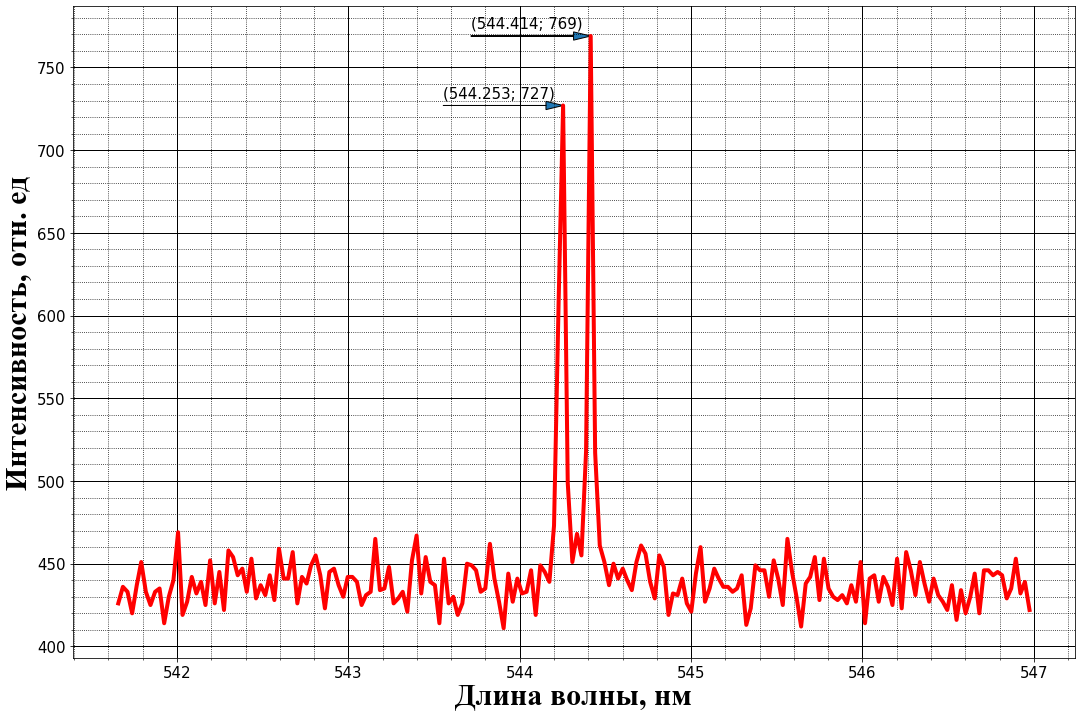

In [74]:
left = 1500
right = 1700
Max_int_index = find_peaks(signal[left:right], 500)
print([[wavelength[i+left], signal[np.where(wavelength == wavelength[i+left])]]  for i in Max_int_index[0]])
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1,1,1)
ax.plot(wavelength[left:right],  signal[left:right], c = 'r',linewidth = 4 ) 
ax.set_xlabel('Длина волны, нм',{'fontname':'Times New Roman'},fontweight='light',color='k', fontsize=30)
ax.set_ylabel("Интенсивность, отн. ед",{'fontname':'Times New Roman'},fontweight='light',color='k', fontsize=30)
ax.arrow(wavelength[Max_int_index[0][0]+left]- 0.7,signal[np.where(wavelength == wavelength[Max_int_index[0][0]+ left])], 0.6, 0,  head_width = 5, head_length = 0.1)
ax.arrow(wavelength[Max_int_index[0][1]+left]- 0.7,signal[np.where(wavelength == wavelength[Max_int_index[0][1]+ left])], 0.6, 0,  head_width = 5, head_length = 0.1)
ax.text(wavelength[Max_int_index[0][0]+left]- 0.7,signal[np.where(wavelength == wavelength[Max_int_index[0][0]+ left])] + 5, "(544.253; 727)", fontsize = 15)
ax.text(wavelength[Max_int_index[0][1]+left]- 0.7,signal[np.where(wavelength == wavelength[Max_int_index[0][1]+ left])] + 5, "(544.414; 769)", fontsize = 15)
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=15)
ax.minorticks_on()

#  Определяем внешний вид линий основной сетки:
ax.grid(which='major',
        color = 'k', 
        linewidth = 1)

#  Определяем внешний вид линий вспомогательной
#  сетки:
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.savefig(save_path + "\\" + "second_doublet.jpg")

По графику можно определить, что линия, представляющая собой PR дублет, находится в интервале [544.12, 544.521] nm. Пики, отвечающие дуплету имеют следующие кооррдинаты [544.253, 727], [544.414, 769]. 
Взглянем на расчетный спектр флуоресценции йода: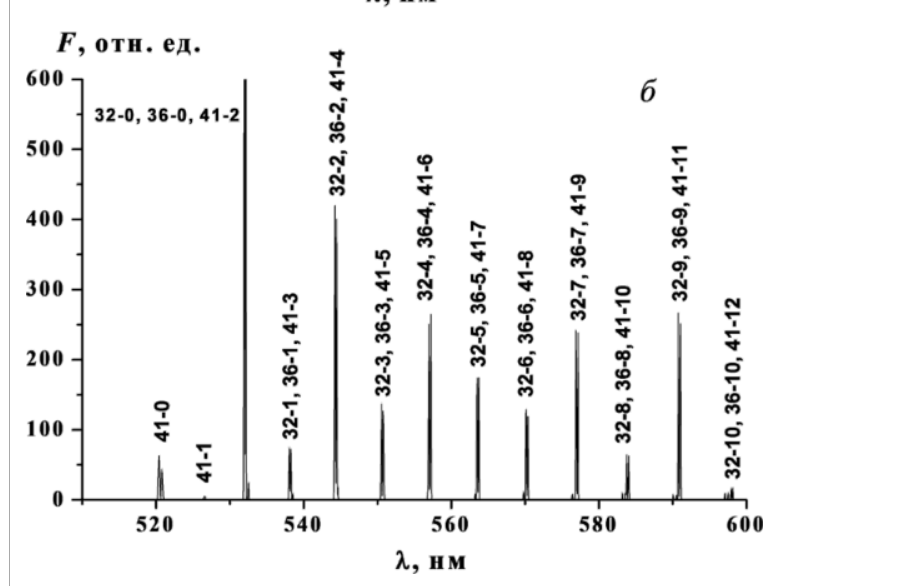
Очевидно, что данная линия относится к стоксовой флуоресценции и является одной из 32-2, 36-2, 41-4. Из-за низкого разрешения линий графика, трудно определить что именно эта за линия.
Это как я себе представляю ситуацию, она отличается от того что предоставил Валя в своем отчете(его препод принял), но мне непонятна его логика. 

Почему возникает дрейф длины волны лазера. По-моему из температуры и из-за частого использования устройства, что меняет параметра его резонатора, в частности деградация кристалла резонатора в связи с его нагревом. 